<a href="https://colab.research.google.com/github/renmiamu/NUS_AI4fi/blob/main/ai4fi_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [239]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [240]:
df = yf.download('ZM', start='2024-01-01', end='2024-12-31')
df.head()

/tmp/ipython-input-240-2942885600.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download('ZM', start='2024-01-01', end='2024-12-31')  #download data from yahoo finance
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,ZM,ZM,ZM,ZM,ZM
Date,,,,,
2024-01-02,69.150002,71.446999,69.000000,71.099998,2869400
2024-01-03,67.169998,68.489998,67.114998,68.309998,2493500
2024-01-04,66.900002,67.540001,66.400002,67.000000,1962100
2024-01-05,66.959999,68.029999,66.470001,66.529999,1958800
2024-01-08,68.389999,68.955002,66.779999,67.199997,2341300


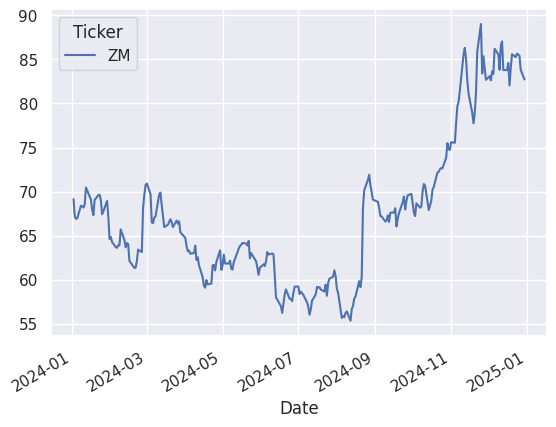

In [241]:
yhoo = df['Close']
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
yhoo.plot();

/tmp/ipython-input-242-3054911640.py:8: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Upper'] = df['Upper'].fillna(method='bfill')
/tmp/ipython-input-242-3054911640.py:9: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Lower'] = df['Lower'].fillna(method='bfill')


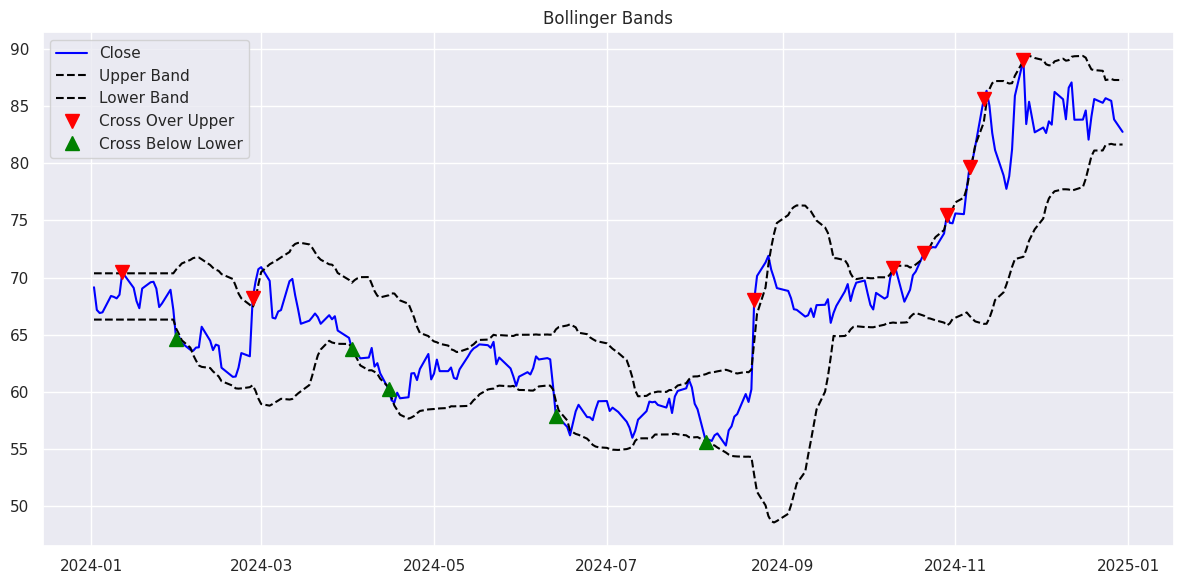

In [242]:
import matplotlib.pyplot as plt

def bollinger_bands(df, window=20, num_std=2):
    df['SMA'] = df['Close'].rolling(window).mean()
    df['STD'] = df['Close'].rolling(window).std()
    df['Upper'] = df['SMA'] + num_std * df['STD']
    df['Lower'] = df['SMA'] - num_std * df['STD']
    df['Upper'] = df['Upper'].fillna(method='bfill')
    df['Lower'] = df['Lower'].fillna(method='bfill')
    return df

df = bollinger_bands(df)

cross_up_dates = []
cross_down_dates = []

for i in range(1, len(df)):
    close_yesterday = df['Close'].iloc[i-1].item()
    upper_yesterday = df['Upper'].iloc[i-1].item()
    close_today = df['Close'].iloc[i].item()
    upper_today = df['Upper'].iloc[i].item()
    lower_yesterday = df['Lower'].iloc[i-1].item()
    lower_today = df['Lower'].iloc[i].item()
    bool1 = close_yesterday <= upper_yesterday
    bool2 = close_today > upper_today
    bool3 = close_yesterday >= lower_yesterday
    bool4 = close_today < lower_today
    if bool1 and bool2:
        cross_up_dates.append(df.index[i])
    if bool3 and bool4:
        cross_down_dates.append(df.index[i])


plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close', color='blue')
plt.plot(df['Upper'], label='Upper Band', linestyle='--', color='black')
plt.plot(df['Lower'], label='Lower Band', linestyle='--', color='black')

plt.plot(cross_up_dates, df.loc[cross_up_dates, 'Close'],
         marker='v', color='red', linestyle='None', markersize=10, label='Cross Over Upper')

plt.plot(cross_down_dates, df.loc[cross_down_dates, 'Close'],
         marker='^', color='green', linestyle='None', markersize=10, label='Cross Below Lower')

plt.title("Bollinger Bands")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
